# Hand Gesture Classification Using MediaPipe Landmarks from the HaGRID Dataset


This project focuses on building a machine learning model to recognize hand gestures using hand landmark data. The model processes normalized hand pose information to classify different hand gestures.

## Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [29]:
import importlib
import utils
importlib.reload(utils)  # Reload the utils module to ensure we have the latest version 
from utils import *

## Data Loading & Exploration

In [4]:
data = pd.read_csv('hand_landmarks_data.csv')
data.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [5]:
print(f"{data.shape[0]} samples and {data.shape[1]} features in the dataset (including label).")
print(f"Number of unique labels: {data.label.nunique()}")
print(data.label.value_counts())

25675 samples and 64 features in the dataset (including label).
Number of unique labels: 18
label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64


In [5]:
data.isna().sum()

x1       0
y1       0
z1       0
x2       0
y2       0
        ..
z20      0
x21      0
y21      0
z21      0
label    0
Length: 64, dtype: int64

## Data Preprocessing:

In [5]:
X = data.drop('label', axis=1)
y = data['label']

In [6]:
new_X = preprocess_data(X.values)
print(f"Original shape of X: {X.shape}")
print(f"New shape of X after preprocessing: {new_X.shape}")

Original shape of X: (25675, 63)
New shape of X after preprocessing: (25675, 42)


In [7]:

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
print(f'Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}')

Training set: (16432, 42), Validation set: (4108, 42), Test set: (5135, 42)


In [10]:
type(new_X)

numpy.ndarray

In [11]:
y_train.iloc[1]

'two_up'

In [55]:
y_train.nunique()

18

## Data Visualization:

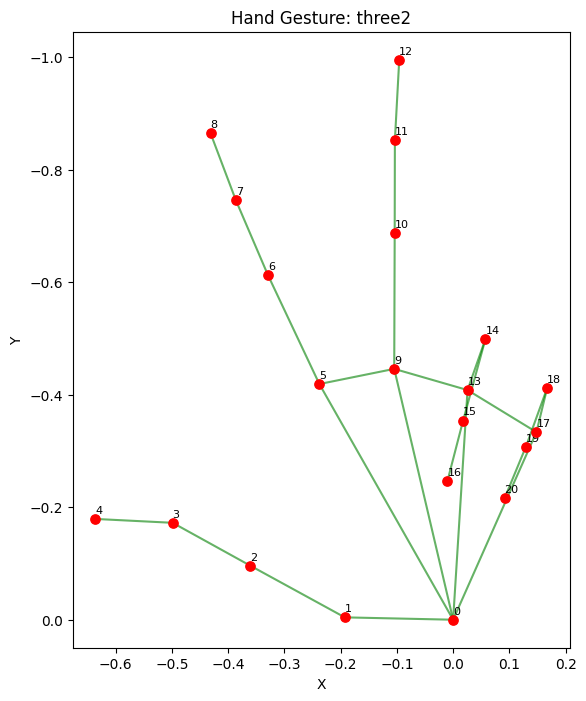

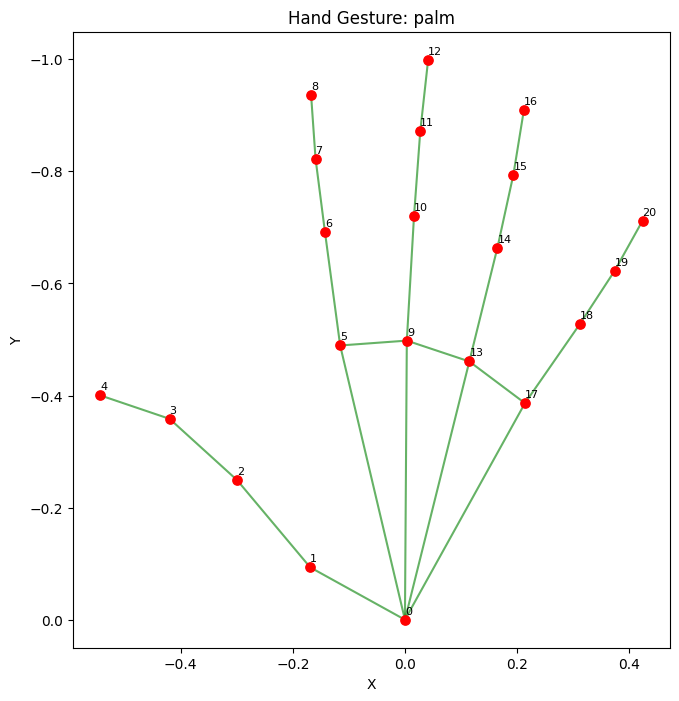

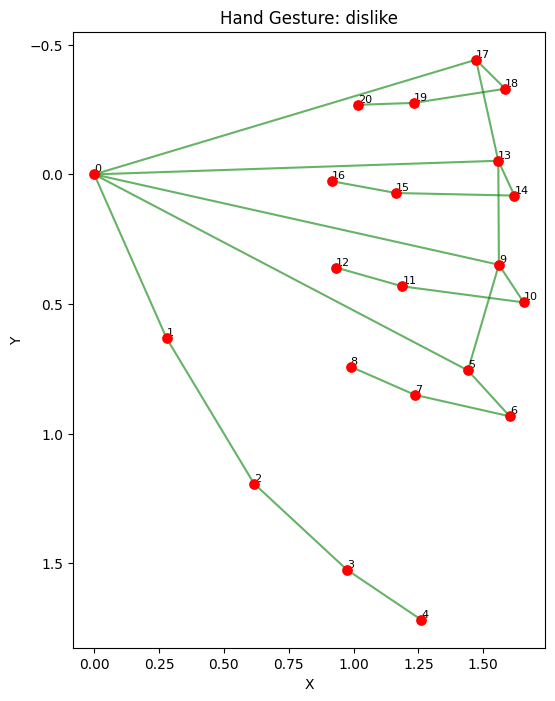

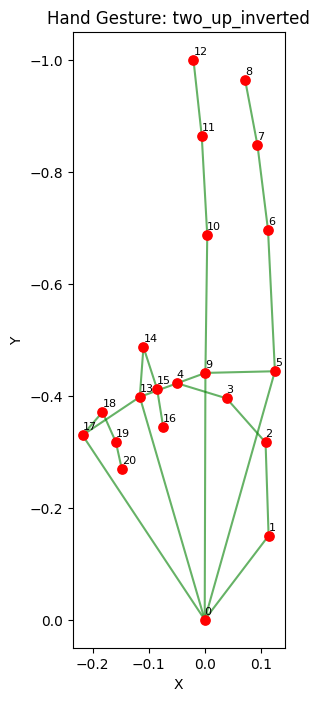

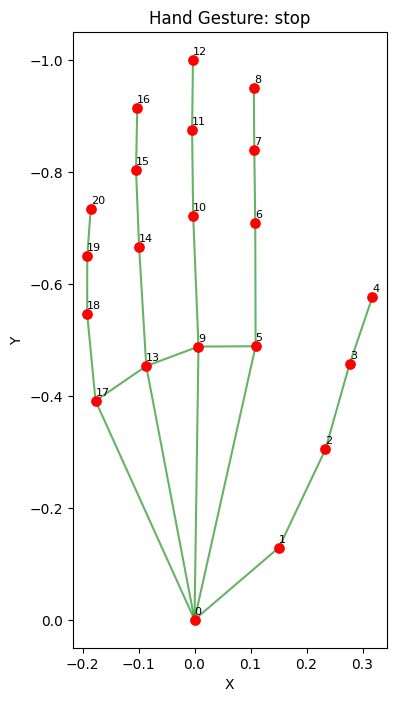

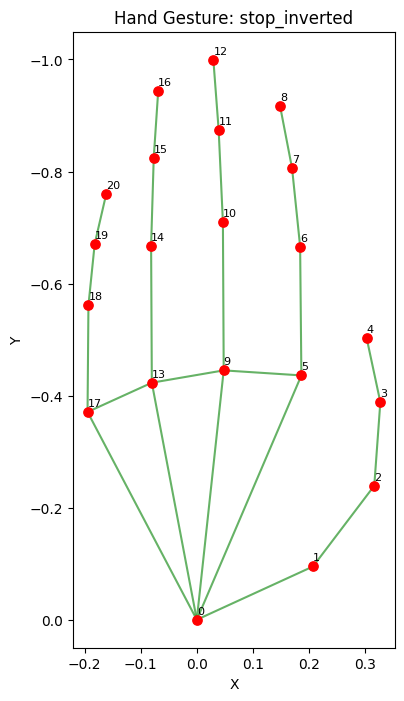

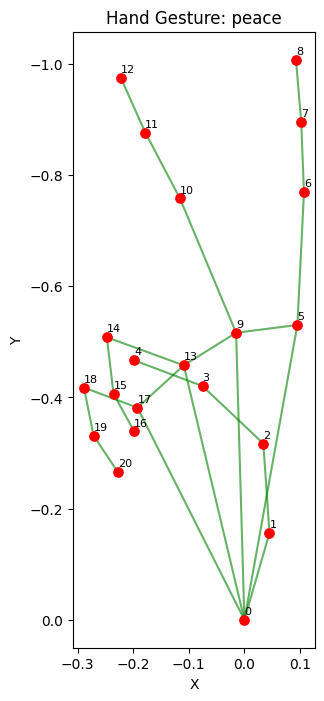

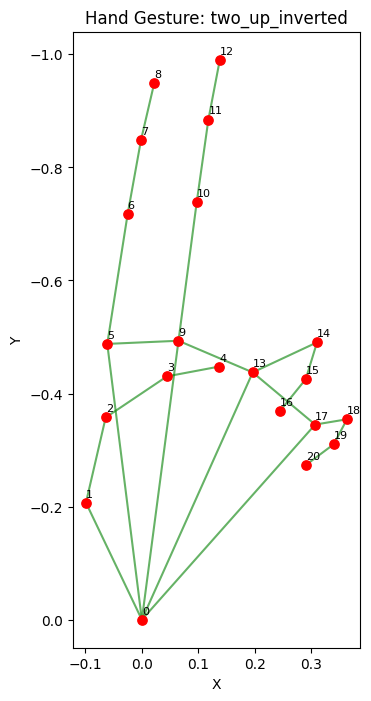

In [11]:
plot_random_hand_gestures(X_train, y_train, num_samples=8)

## Models Training:

In [8]:
# Encode labels for train, test, val sets
y_encoded_train, label_encoder = encode_labels(y_train)
y_encoded_test, _ = encode_labels(y_test)
y_encoded_val, _ = encode_labels(y_val)

print("Encoded labels:")
print(f"Classes: {label_encoder.classes_}")
print(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}, Val set shape: {X_val.shape}")
print(f"Number of classes: {len(label_encoder.classes_)}\n")

Encoded labels:
Classes: ['call' 'dislike' 'fist' 'four' 'like' 'mute' 'ok' 'one' 'palm' 'peace'
 'peace_inverted' 'rock' 'stop' 'stop_inverted' 'three' 'three2' 'two_up'
 'two_up_inverted']
Train set shape: (16432, 42), Test set shape: (5135, 42), Val set shape: (4108, 42)
Number of classes: 18



### KNN Classifier:

In [22]:
print("=" * 50)
print("KNN CLASSIFIER (k=5)")
print("=" * 50)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_encoded_train)

y_pred_knn_val, knn_val_acc, knn_val_prec, knn_val_rec, knn_val_f1 = training_results(X_train, X_val, y_encoded_train, y_encoded_val, knn)

KNN CLASSIFIER (k=5)
Train Set:
  Accuracy:  0.9808
  Precision: 0.9809
  Recall:    0.9808
  F1 Score:  0.9808

Validation Set:
  Accuracy:  0.9742
  Precision: 0.9748
  Recall:    0.9742
  F1 Score:  0.9743


Text(0.5, 23.38159722222222, 'Predicted Label')

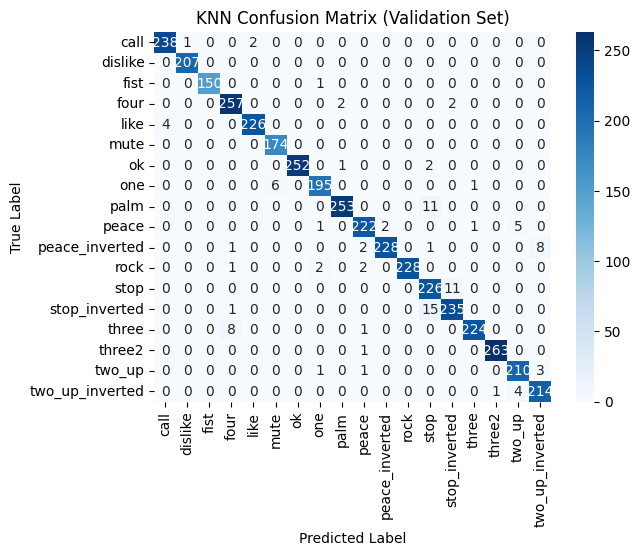

In [17]:
cm_knn = confusion_matrix(y_encoded_val, y_pred_knn_val)

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('KNN Confusion Matrix (Validation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig("./confusion_matrix_KNN.png")

### SVC Classifier:

In [23]:

print("\n" + "=" * 50)
print("SVC CLASSIFIER (RBF kernel)")
print("=" * 50)
svc = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svc.fit(X_train, y_encoded_train)

y_pred_svc_val, svc_val_acc, svc_val_prec, svc_val_rec, svc_val_f1 = training_results(X_train, X_val, y_encoded_train, y_encoded_val, svc)


SVC CLASSIFIER (RBF kernel)
Train Set:
  Accuracy:  0.9779
  Precision: 0.9783
  Recall:    0.9779
  F1 Score:  0.9780

Validation Set:
  Accuracy:  0.9771
  Precision: 0.9777
  Recall:    0.9771
  F1 Score:  0.9772


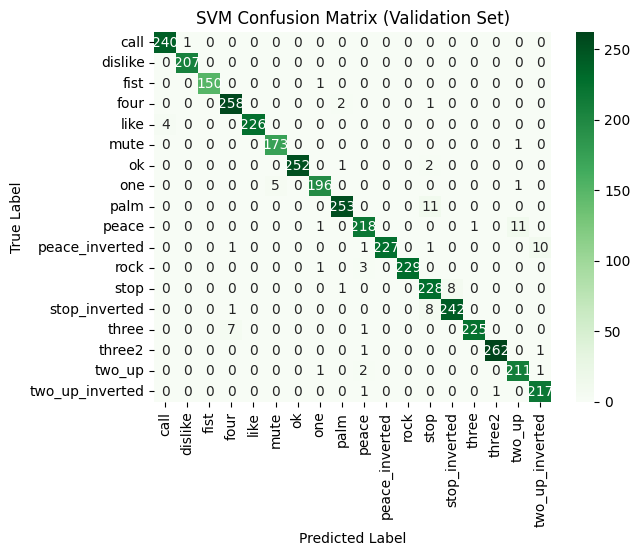

In [16]:
cm_svc = confusion_matrix(y_encoded_val, y_pred_svc_val)

sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Greens', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('SVM Confusion Matrix (Validation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig("./confusion_matrix_SVC.png")

### RandomForest Classifier:

In [24]:
print("\n" + "=" * 50)
print("RANDOM FOREST CLASSIFIER (100 estimators)")
print("=" * 50)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_encoded_train)

y_pred_rf_val, rf_val_acc, rf_val_prec, rf_val_rec, rf_val_f1 = training_results(X_train, X_val, y_encoded_train, y_encoded_val, rf)


RANDOM FOREST CLASSIFIER (100 estimators)
Train Set:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1 Score:  1.0000

Validation Set:
  Accuracy:  0.9769
  Precision: 0.9773
  Recall:    0.9769
  F1 Score:  0.9770


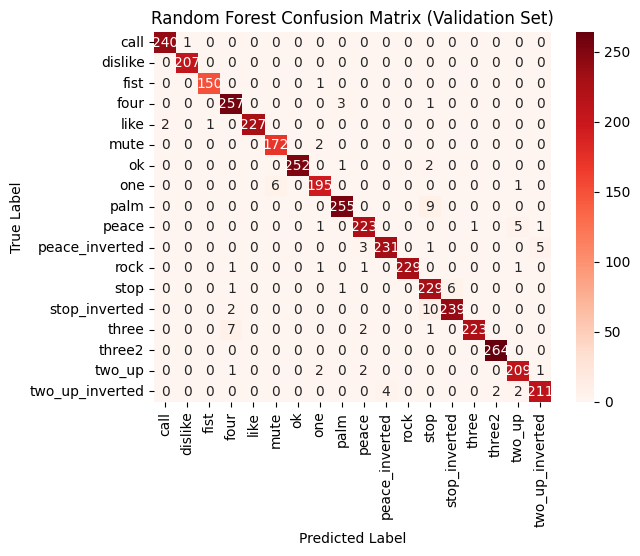

In [18]:
cm_rf = confusion_matrix(y_encoded_val, y_pred_rf_val)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Random Forest Confusion Matrix (Validation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig("./confusion_matrix_RandomForest.png")

### Gradient Boost Classifier:

In [25]:
# ===== Gradient Boosting Classifier =====
print("=" * 50)
print("GRADIENT BOOSTING CLASSIFIER (100 estimators)")
print("=" * 50)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb.fit(X_train, y_encoded_train)

y_pred_gb_val, gb_val_acc, gb_val_prec, gb_val_rec, gb_val_f1 = training_results(X_train, X_val, y_encoded_train, y_encoded_val, gb)

GRADIENT BOOSTING CLASSIFIER (100 estimators)
Train Set:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1 Score:  1.0000

Validation Set:
  Accuracy:  0.9771
  Precision: 0.9775
  Recall:    0.9771
  F1 Score:  0.9772


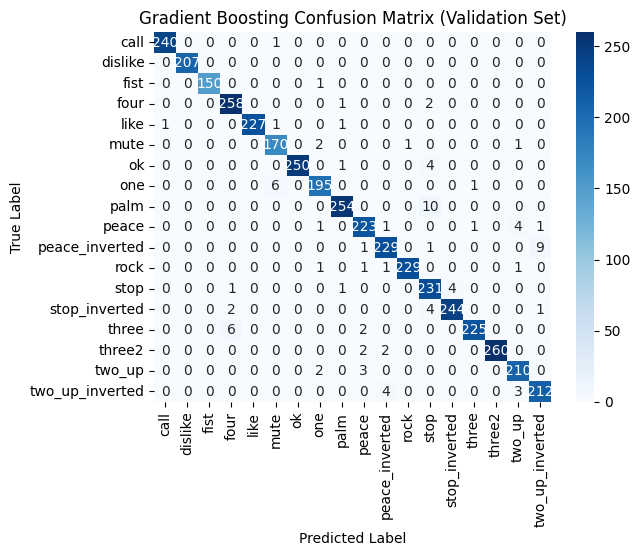

In [20]:
cm_gb = confusion_matrix(y_encoded_val, y_pred_gb_val)

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Gradient Boosting Confusion Matrix (Validation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig("./confusion_matrix_GradientBoosting.png")

            Model  Accuracy  Precision   Recall  F1 Score
              KNN  0.974197   0.974802 0.974197  0.974323
              SVC  0.977118   0.977683 0.977118  0.977208
    Random Forest  0.976874   0.977308 0.976874  0.976961
Gradient Boosting  0.977118   0.977537 0.977118  0.977217


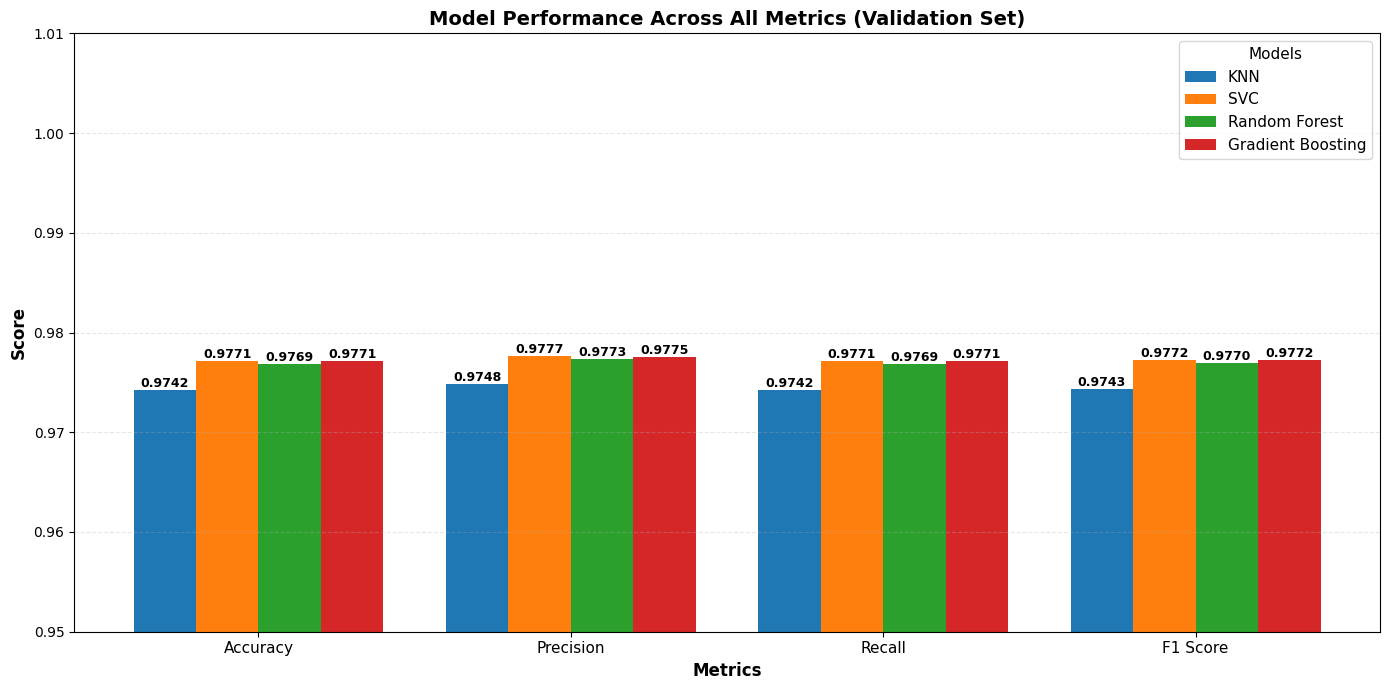

In [ ]:
# Create comparison dataframe
comparison_data_final = {
    'Model': ['KNN', 'SVC', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [knn_val_acc, svc_val_acc, rf_val_acc, gb_val_acc],
    'Precision': [knn_val_prec, svc_val_prec, rf_val_prec, gb_val_prec],
    'Recall': [knn_val_rec, svc_val_rec, rf_val_rec, gb_val_rec],
    'F1 Score': [knn_val_f1, svc_val_f1, rf_val_f1, gb_val_f1]
}

comparison_df_final = pd.DataFrame(comparison_data_final)
print(comparison_df_final.to_string(index=False))

# Create grouped bar chart on same plot
fig, ax = plt.subplots(figsize=(14, 7))

# Data setup
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = comparison_df_final['Model'].values
x = np.arange(len(metrics))
width = 0.2

# Model colors
model_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create grouped bars for each model
for i, model in enumerate(models):
    values = [comparison_df_final.loc[i, metric] for metric in metrics]
    offset = width * (i - 1.5)
    bars = ax.bar(x + offset, values, width, label=model, color=model_colors[i])
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')


ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Across All Metrics (Validation Set)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=11, loc='upper right', title='Models', title_fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim([0.95, 1.01])

plt.tight_layout()
plt.savefig("./models_artifacts/comparison_grouped_bar_chart.png")


## Models Comparison:
### SVC vs RandomForest

In [27]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'accuracy':'accuracy',
           'precision':'precision_weighted',
           'recall':'recall_weighted',
           'f1':'f1_weighted'}

svc_cv = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
rf_cv = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

res_svc = cross_validate(svc_cv, X_train, y_encoded_train, cv=cv, scoring=scoring, n_jobs=-1)
res_rf = cross_validate(rf_cv, X_train, y_encoded_train, cv=cv, scoring=scoring, n_jobs=-1)

def summarize(res):
    return {k.replace('test_',''): (np.mean(v), np.std(v)) for k,v in res.items() if k.startswith('test_')}

sum_svc = summarize(res_svc)
sum_rf = summarize(res_rf)

df = pd.DataFrame({
    'Metric': list(sum_svc.keys()),
    'SVC Mean': [f"{m[0]:.4f}" for m in sum_svc.values()],
    'SVC Std':  [f"{m[1]:.4f}" for m in sum_svc.values()],
    'RF Mean':  [f"{m[0]:.4f}" for m in sum_rf.values()],
    'RF Std':   [f"{m[1]:.4f}" for m in sum_rf.values()],
})

print(df.to_string(index=False))

   Metric SVC Mean SVC Std RF Mean RF Std
 accuracy   0.9726  0.0026  0.9711 0.0013
precision   0.9732  0.0025  0.9713 0.0013
   recall   0.9726  0.0026  0.9711 0.0013
       f1   0.9726  0.0026  0.9711 0.0013


## Fine tuning RandomForest:

In [26]:
print("\n" + "=" * 50)
print("RANDOM FOREST CLASSIFIER (110 estimators)")
print("=" * 50)
rf = RandomForestClassifier(n_estimators=110, random_state=42, n_jobs=-1)
rf.fit(X_train, y_encoded_train)

y_pred_rf_val, rf_val_acc, rf_val_prec, rf_val_rec, rf_val_f1 = training_results(X_train, X_val, y_encoded_train, y_encoded_val, rf)


RANDOM FOREST CLASSIFIER (110 estimators)
Train Set:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1 Score:  1.0000

Validation Set:
  Accuracy:  0.9771
  Precision: 0.9776
  Recall:    0.9771
  F1 Score:  0.9772


## Models Comparison - V2:
### SVC vs RandomForest

In [28]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'accuracy':'accuracy',
           'precision':'precision_weighted',
           'recall':'recall_weighted',
           'f1':'f1_weighted'}

svc_cv = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
rf_cv = RandomForestClassifier(n_estimators=110, random_state=42, n_jobs=-1)

res_svc = cross_validate(svc_cv, X_train, y_encoded_train, cv=cv, scoring=scoring, n_jobs=-1)
res_rf = cross_validate(rf_cv, X_train, y_encoded_train, cv=cv, scoring=scoring, n_jobs=-1)

def summarize(res):
    return {k.replace('test_',''): (np.mean(v), np.std(v)) for k,v in res.items() if k.startswith('test_')}

sum_svc = summarize(res_svc)
sum_rf = summarize(res_rf)

df = pd.DataFrame({
    'Metric': list(sum_svc.keys()),
    'SVC Mean': [f"{m[0]:.4f}" for m in sum_svc.values()],
    'SVC Std':  [f"{m[1]:.4f}" for m in sum_svc.values()],
    'RF Mean':  [f"{m[0]:.4f}" for m in sum_rf.values()],
    'RF Std':   [f"{m[1]:.4f}" for m in sum_rf.values()],
})

print(df.to_string(index=False))

   Metric SVC Mean SVC Std RF Mean RF Std
 accuracy   0.9726  0.0026  0.9708 0.0017
precision   0.9732  0.0025  0.9711 0.0016
   recall   0.9726  0.0026  0.9708 0.0017
       f1   0.9726  0.0026  0.9708 0.0017


## Best Model:

### SVC is the winner!!

### Fine tuning SVC:

60 --> 0.9825 <br>
50 --> 0.9832 <br>
40 --> 0.9817

In [27]:

print("\n" + "=" * 50)
print("SVC CLASSIFIER (RBF kernel)")
print("=" * 50)
svc = SVC(kernel='rbf', C=50, gamma='scale', random_state=42)
svc.fit(X_train, y_encoded_train)

y_pred_svc_val, svc_val_acc, svc_val_prec, svc_val_rec, svc_val_f1 = training_results(X_train, X_val, y_encoded_train, y_encoded_val, svc)


SVC CLASSIFIER (RBF kernel)
Train Set:
  Accuracy:  0.9880
  Precision: 0.9881
  Recall:    0.9880
  F1 Score:  0.9880

Validation Set:
  Accuracy:  0.9832
  Precision: 0.9837
  Recall:    0.9832
  F1 Score:  0.9833


In [28]:
y_pred_svc_test = svc.predict(X_test)

print("\nSVC - Test Set:")
print(f"  Accuracy:  {accuracy_score(y_encoded_test, y_pred_svc_test):.4f}")
print(f"  Precision: {precision_score(y_encoded_test, y_pred_svc_test, average='weighted'):.4f}")
print(f"  Recall:    {recall_score(y_encoded_test, y_pred_svc_test, average='weighted'):.4f}")
print(f"  F1 Score:  {f1_score(y_encoded_test, y_pred_svc_test, average='weighted'):.4f}")


SVC - Test Set:
  Accuracy:  0.9846
  Precision: 0.9848
  Recall:    0.9846
  F1 Score:  0.9846


In [38]:
import os
import joblib

os.makedirs("./models_artifacts", exist_ok=True)
svc_path = "./models_artifacts/svc_model.joblib"
le_path = "./models_artifacts/label_encoder.joblib"

joblib.dump(svc, svc_path)
joblib.dump(label_encoder, le_path)

print(f"Saved svc to {svc_path}")
print(f"Saved label_encoder to {le_path}")

Saved svc to ./models_artifacts/svc_model.joblib
Saved label_encoder to ./models_artifacts/label_encoder.joblib


## Using Model:

In [41]:
import urllib.request

url = "https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task"
urllib.request.urlretrieve(url, "hand_landmarker.task")

('hand_landmarker.task', <http.client.HTTPMessage at 0x1c1c71e3860>)

In [31]:
import cv2
import numpy as np
import joblib
import mediapipe as mp
from mediapipe.tasks.python import vision
from mediapipe.tasks import python
from collections import deque

In [32]:
svc_model = joblib.load("./models_artifacts/svc_model.joblib")
label_encoder = joblib.load("./models_artifacts/label_encoder.joblib")

base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')

options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=1,
    running_mode=vision.RunningMode.VIDEO
)

detector = vision.HandLandmarker.create_from_options(options)



prediction_window = deque(maxlen=7)
stable_label = ""

cap = cv2.VideoCapture("HandGestures.mp4")

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(3))
height = int(cap.get(4))

out = cv2.VideoWriter(
    "output.mp4",
    cv2.VideoWriter_fourcc(*'mp4v'),
    fps,
    (width, height)
)


frame_idx = 0

while cap.isOpened():

    ret, frame = cap.read()
    if not ret:
        break

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb)

    result = detector.detect_for_video(mp_image, frame_idx)
    frame_idx += 1

    if result.hand_landmarks:

        hand_landmarks = result.hand_landmarks[0]

        # Convert to model input
        features = landmarks_to_model_input(hand_landmarks)

        # Predict
        pred = svc_model.predict(features)[0]

        # Add to temporal window
        prediction_window.append(pred)

        # Stabilize
        if len(prediction_window) == prediction_window.maxlen:
            most_common = max(set(prediction_window), key=prediction_window.count)
            stable_label = label_encoder.inverse_transform([most_common])[0]

        # Draw hand
        draw_hand_landmarks(frame, hand_landmarks)

    # Draw stable label
    if stable_label != "":
        cv2.putText(
            frame,
            stable_label,
            (30, 50),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (0,255,0),
            2,
            cv2.LINE_AA
        )

    out.write(frame)

    
cap.release()
out.release()
cv2.destroyAllWindows()
print("Inference complete, output.mp4 saved.")

Inference complete, output.mp4 saved.
